In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path 
from ipywidgets import interact
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
import pickle

In [33]:
# Load dataset
Efficient_df = pd.read_csv("portfolio.csv", parse_dates=True, index_col="ticker")

# from selection portfolio, the following 10 tickers were selected
# Tickers= Effiecient_df[['GPC', "GIS", "COG", "SYF", "AMGN", "lUV" , "GOOGL", "lYB" "HST", "PPL"]]

# back out volatility by using sharpe ratios and returns
Efficient_df['vol'] = Efficient_df['sharpe ratio'] * Efficient_df['FFM returns']
Efficient_df.head(20)

,name,sector,sharpe ratio,FFM returns,P/E ratio,EPS,beta,mkt cap,shares,vol
ticker,,,,,,,,,,
GPC,Genuine Parts,Consumer Discretionary,2.924464,0.074228,17.71,5.45,0.89,14016415887,145293000,0.217077
GIS,General Mills,Consumer Staples,2.641281,0.063147,15.34,3.48,0.73,32242795100,604817000,0.166789
OKE,ONEOK,Energy,0.917326,0.230148,25.56,3.01,1.11,31799253894,413085000,0.211121
SYF,Synchrony Financial,Financials,2.493336,0.091836,6.07,5.56,1.21,20704848750,613477000,0.228978
AMGN,Amgen Inc,Health Care,1.861649,0.151749,17.36,12.88,1.12,131810065840,589807000,0.282503
LUV,Southwest Airlines,Industrials,1.726576,0.107833,13.77,4.21,1.47,29987649751,517296000,0.186182
GOOGL,Alphabet Inc Class A,Information Technology,1.198026,0.214640,30.89,49.16,1.02,1044236513876,299895000,0.257144
LYB,LyondellBasell,Materials,2.072393,0.103512,8.65,9.55,1.45,27505799491,333000000,0.214518
HST,Host Hotels & Resorts,Real Estate,2.308137,0.052833,10.89,1.55,1.17,12127479870,717178000,0.121946


In [25]:
np.random.seed(42)
num_portfolios = 30_000

In [26]:
#all_weights = np.zeros((num_portfolios, len(Efficient_df.index)))
#ret_arr = np.zeros(num_portfolios)
#vol_arr = np.zeros(num_portfolios)
#sharpe_arr = np.zeros(num_portfolios)

In [27]:
# populate the empty lists with each portfolios returns,risk and weight
all_weights = np.zeros((num_portfolios, len(Efficient_df.index)))
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

In [28]:
# Evinski, what is this loop supposed to do?
for x in range(num_portfolios):
    # produce random values for each stock
    weights = np.array(np.random.random(len(Efficient_df.index)))

    # get weights for each stock by normalizing sum to 1
    weights = weights/np.sum(weights)

    # store weights for portfolio
    all_weights[x,:] = weights

    # store returns for portfolio
    ret_arr[x] = np.sum(Efficient_df['FFM returns'] * weights)

    # get vol
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(Efficient_df['FFM returns'].cov(
        Efficient_df['FFM returns']), weights)))

    # get portfolio sharpe
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [29]:
# @ Evinski.  what is this for?
#print(all_weights[1462,:])

In [30]:
# prints the best portfolio from above
print("The max sharpe ratio in the array: {}".format(sharpe_arr.max()))
print("The location in the array: {}".format(sharpe_arr.argmax()))

The max sharpe ratio in the array: 6.730068635408508
The location in the array: 15333


# Pickling output for use in dashboard

In [31]:
# all_weights for use in dashboard2.ipnyb file
filename = "all_weights_pickle"  # stores merged_df as merged_df_pickle
outfile = open(filename, "wb")  # saves into pickle
pickle.dump(all_weights, outfile)
outfile.close()

In [9]:
# Efficient_df for use in dashboard2.ipnyb file
filename = "Efficient_df_pickle"  # stores merged_df as merged_df_pickle
outfile = open(filename, "wb")  # saves into pickle
pickle.dump(Efficient_df, outfile)
outfile.close()

In [10]:
# vol_arr for use in dashboard2.ipnyb file
filename = "vol_arr_pickle"  # stores merged_df as merged_df_pickle
outfile = open(filename, "wb")  # saves into pickle
pickle.dump(vol_arr, outfile)
outfile.close()

In [11]:
# ret_arr for use in dashboard2.ipnyb file
filename = "ret_arr_pickle"  # stores merged_df as merged_df_pickle
outfile = open(filename, "wb")  # saves into pickle
pickle.dump(ret_arr, outfile)
outfile.close()

In [12]:
# sharpe_arr for use in dashboard2.ipnyb file
filename = "sharpe_arr_pickle"  # stores merged_df as merged_df_pickle
outfile = open(filename, "wb")  # saves into pickle
pickle.dump(sharpe_arr, outfile)
outfile.close()

In [13]:
max_sharp_return = ret_arr[sharpe_arr.argmax()]
# max_sharp_return for use in dashboard2.ipnyb file
filename = "max_sharp_return_pickle"  # stores merged_df as merged_df_pickle
outfile = open(filename, "wb")  # saves into pickle
pickle.dump(max_sharp_return, outfile)
outfile.close()

In [14]:
max_sharp_vol = vol_arr[sharpe_arr.argmax()]
# pickling max_sharp_vol_df for use in dashboard2.ipnyb file
filename = "max_sharp_vol_pickle"  # stores merged_df as merged_df_pickle
outfile = open(filename, "wb")  # saves into pickle
pickle.dump(max_sharp_vol, outfile)
outfile.close()

In [16]:
min_sharp_return= ret_arr[sharpe_arr.argmin()]
# pickling min_sharp_return_df for use in dashboard2.ipnyb file
filename = "min_sharp_return_pickle"  # stores merged_df as merged_df_pickle
outfile = open(filename, "wb")  # saves into pickle
pickle.dump(min_sharp_return, outfile)
outfile.close()

In [17]:
min_sharp_vol= vol_arr[sharpe_arr.argmin()]
# pickling min_sharp_vol for use in dashboard2.ipnyb file
filename = "min_sharp_vol_pickle"  # stores merged_df as merged_df_pickle
outfile = open(filename, "wb")  # saves into pickle
pickle.dump(min_sharp_vol, outfile)
outfile.close()

In [18]:
efficient_frontier_portfolio = {'Returns': ret_arr,
         'Volatility': vol_arr,
         'Sharpe Ratio': sharpe_arr}

efficient_frontier_portfolio


{'Returns': array([0.10674591, 0.12454371, 0.11012658, ..., 0.09945508, 0.12841312,
        0.13387224]),
 'Volatility': array([0.0223018 , 0.0238768 , 0.02209265, ..., 0.0230914 , 0.02283247,
        0.02185845]),
 'Sharpe Ratio': array([4.78642493, 5.21609633, 4.98476165, ..., 4.30701917, 5.62414554,
        6.12450766])}

In [19]:
#efficient_portfolio_df = pd.DataFrame(portfolio)

#column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in Efficient_df.index]

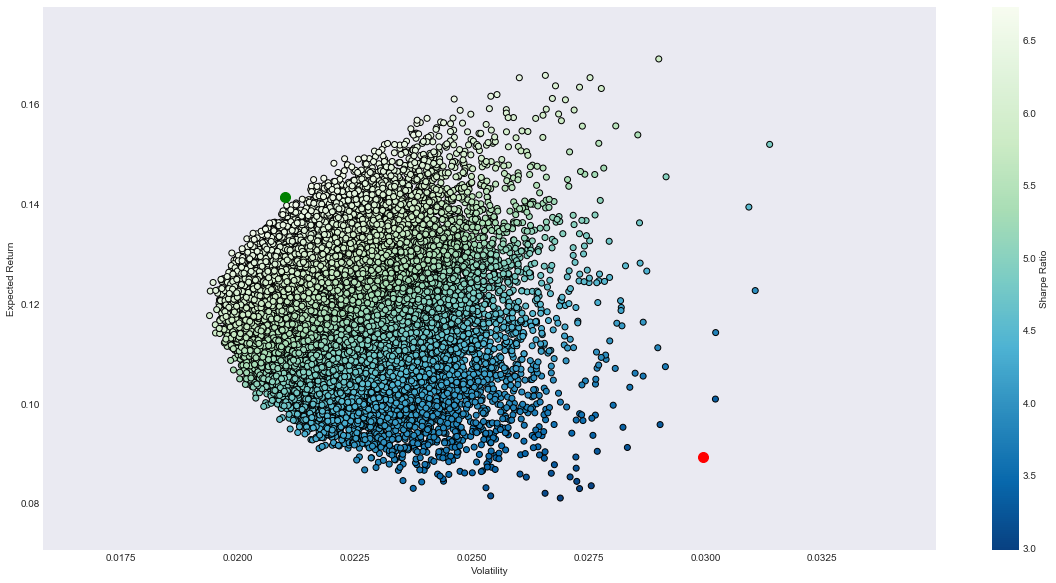

In [35]:
plt.style.use('seaborn-dark')
plt.figure(figsize=(20,10))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='GnBu_r',edgecolors='black')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.scatter(max_sharp_vol, max_sharp_return,c='green', s=100)
plt.scatter(min_sharp_vol, min_sharp_return,c='red', s=100) # red dot

    
plt.show()